In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [24]:
df = pd.read_csv(r"https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S10_Practice_Vehicle_Data.csv")
df = df.ffill()
df = df.select_dtypes(include=[np.number])
df.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,91.370778
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [27]:
def find_best_k(df):
    score, best_k = -1, -1
    for k in range(2, 11):
        kmean = KMeans(k, random_state=42)
        pred = kmean.fit_predict(df)
        sil_score = silhouette_score(df, pred)
        if sil_score >= score:
            score = sil_score
            best_k = k
            
    return best_k

In [ ]:
k = find_best_k(df)
print(f"Best number of clusters (k): {k}")
kmean = KMeans(k, random_state=42)
cluster_labels = kmean.fit_predict(df)

Best number of clusters (k): 3


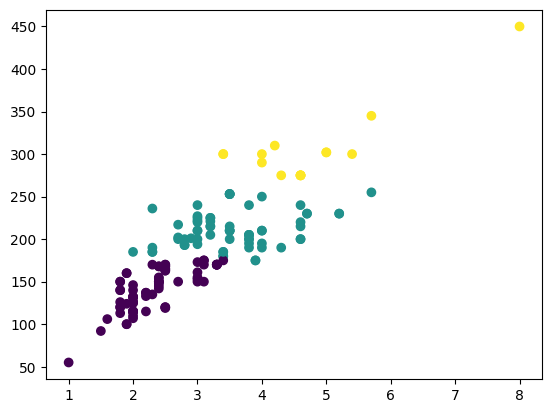

In [31]:
plt.scatter(df["Engine_size"], df["Horsepower"], c=cluster_labels)